**Brian Blaylock**  
*July 27, 2021*

# National Blend of Models (NMB)

cgfrib interprets the NMB strangely. Not sure what is going on here. I posted an issue on GitHub: https://github.com/ecmwf/cfgrib/issues/240

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie('2021-07-11 13:00', 
           model='nbm', fxx=1,
           product='co')

🏋🏻‍♂️ Found 2021-Jul-11 13:00 UTC F01 [NBM] [product=co] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [3]:
H.SOURCES

{'aws': 'https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20210711/13/core/blend.t13z.core.f001.co.grib2'}

In [5]:
x = H.xarray('^TMP:2 m .*$')

📇 Download subset: [NBM] model [co] product run at 2021-Jul-11 13:00 UTC F01                                                            
 cURL from https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20210711/13/core/blend.t13z.core.f001.co.grib2
   1: GRIB_message=54  TMP:2 m above ground:1 hour fcst
   2: GRIB_message=55  TMP:2 m above ground:1 hour fcst:ens std dev


In [6]:
x

<xarray.Dataset>
Dimensions:            (y: 1597, x: 2345)
Coordinates:
    time               datetime64[ns] 2021-07-11T13:00:00
    step               timedelta64[ns] 01:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 19.23 19.23 19.24 ... 54.38 54.38 54.37
    longitude          (y, x) float64 233.7 233.7 233.8 ... 300.9 300.9 301.0
    valid_time         datetime64[ns] 2021-07-11T14:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                (y, x) float32 294.1 294.1 294.1 ... 286.1 286.1 286.1
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          14
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   nbm
    remote_grib:             https://noaa-nbm-grib2-pds.s3.amazonaws.com/blen...
    local_grib:              /p/cwfs/blaylock/data/nbm/20210711/blend.t13z.co...

/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

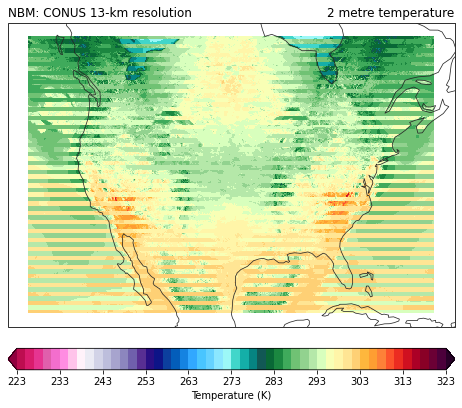

In [7]:
xvar = x.t2m

ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, xvar, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(xvar.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

In [9]:
x = H.xarray('WIND:10 m.*$')

📇 Download subset: [NBM] model [co] product run at 2021-Jul-11 13:00 UTC F01                                                            
 cURL from https://noaa-nbm-grib2-pds.s3.amazonaws.com/blend.20210711/13/core/blend.t13z.core.f001.co.grib2
   1: GRIB_message=69  WIND:10 m above ground:1 hour fcst
   2: GRIB_message=72  WIND:10 m above ground:1 hour fcst:ens std dev


/p/home/blaylock/anaconda3/envs/basic38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'NBM: CONUS 13-km resolution')

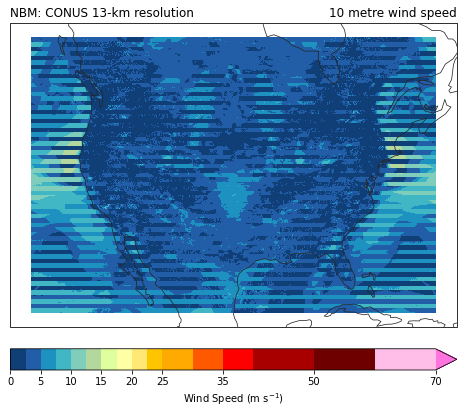

In [10]:
xvar = x.si10

ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, xvar, 
              transform=pc, 
              **cm_wind().cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_wind().cbar_kwargs)

ax.set_title(xvar.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

In [11]:
H.read_idx().loc[:, 'variable':].apply(lambda x: ':'.join(x).rstrip(':'), axis=1)

grib_message
1.0                    APTMP:2 m above ground:1 hour fcst
2.0                              CAPE:surface:1 hour fcst
3.0                  CAPE:surface:1 hour fcst:ens std dev
4.0                        CEIL:cloud ceiling:1 hour fcst
5.0     CEIL:cloud ceiling:1 hour fcst:prob <304.8:pro...
                              ...                        
68.0       GUST:10 m above ground:1 hour fcst:ens std dev
69.0                   WIND:10 m above ground:1 hour fcst
70.0                   WIND:30 m above ground:1 hour fcst
71.0                   WIND:80 m above ground:1 hour fcst
72.0       WIND:10 m above ground:1 hour fcst:ens std dev
Length: 72, dtype: object

In [17]:
H.read_idx('^TMP:2 m .*1 hour fcst$')

,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,?,??
grib_message,,,,,,,,,,
54.0,68539263,69940961,68539263-69940961,2021-07-11 13:00:00,2021-07-11 14:00:00,TMP,2 m above ground,1 hour fcst,,
